In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")


In [30]:
movies = pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [32]:
tags = pd.read_csv('data/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Exploratoy Data Analysis (EDA)

### Merge Data for Recommender System

In [33]:
df = movies.merge(ratings, on='movieId', how='left')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


Check Missing Data

In [34]:
df.isnull().sum()

movieId       0
title         0
genres        0
userId       18
rating       18
timestamp    18
dtype: int64

In [35]:
percent = df.userId.isnull().sum() / df.shape[0] * 100
print(f'Percentage of missing data: {percent:.5f}%')

Percentage of missing data: 0.01785%


Drop NA as amount of missing data is small when compare to total number of data. 

In [36]:
df.dropna(inplace=True)

### Top 20 Most Reviewed Movies Sorted by Movie Ratings

In [37]:
userid_count = df.groupby('title')['userId'].count().reset_index()
userid_count

,title,userId
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [38]:
movie_mean = df.groupby('title')['rating'].mean().reset_index()
movie_mean

,title,rating
0,'71 (2014),4.000000
1,'Hellboy': The Seeds of Creation (2004),4.000000
2,'Round Midnight (1986),3.500000
3,'Salem's Lot (2004),5.000000
4,'Til There Was You (1997),4.000000
...,...,...
9714,eXistenZ (1999),3.863636
9715,xXx (2002),2.770833
9716,xXx: State of the Union (2005),2.000000
9717,¡Three Amigos! (1986),3.134615


In [39]:
df1 = pd.merge(userid_count, movie_mean, on='title', how='left').sort_values('userId', ascending=False)
df1

,title,userId,rating
3158,Forrest Gump (1994),329,4.164134
7593,"Shawshank Redemption, The (1994)",317,4.429022
6865,Pulp Fiction (1994),307,4.197068
7680,"Silence of the Lambs, The (1991)",279,4.161290
5512,"Matrix, The (1999)",278,4.192446
...,...,...,...
4773,King Solomon's Mines (1950),1,3.000000
4772,King Solomon's Mines (1937),1,2.500000
4771,King Ralph (1991),1,1.500000
4769,King Kong Lives (1986),1,2.000000


<AxesSubplot:xlabel='title', ylabel='rating'>

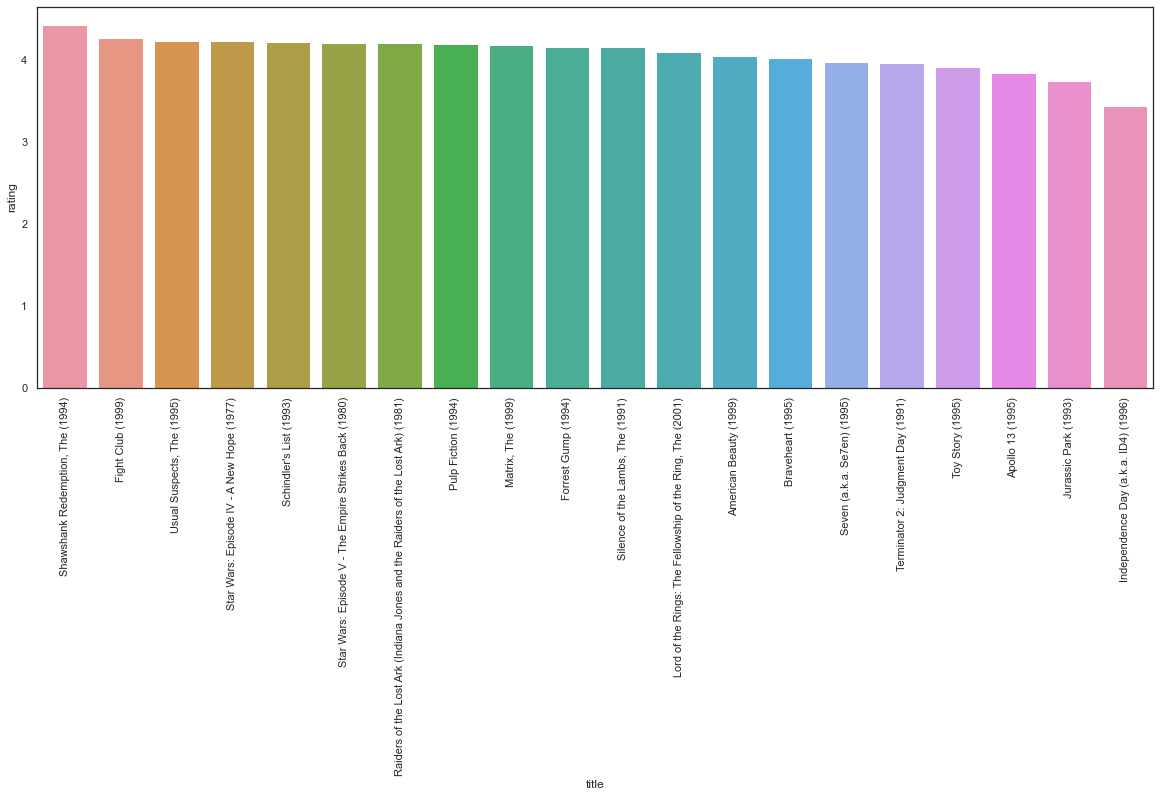

In [40]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
order = df1[:20].sort_values(by='rating', ascending=False).title
sns.barplot(data=df1[:20], x='title', y='rating', order=order)

### Top Movie Genre in the Dataset

In [41]:
df_genre = movies.genres.str.split('|')
df_genre.head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres, dtype: object

In [42]:
genre_count = {}

for x in df_genre:
    for y in x:
        if genre_count.get(y, False):
            genre_count[y] = genre_count[y] + 1
        else:
            genre_count[y] = 1

genre_count.pop('(no genres listed)')

34

In [43]:
x = [*genre_count]
y = [*genre_count.values()]

<AxesSubplot:>

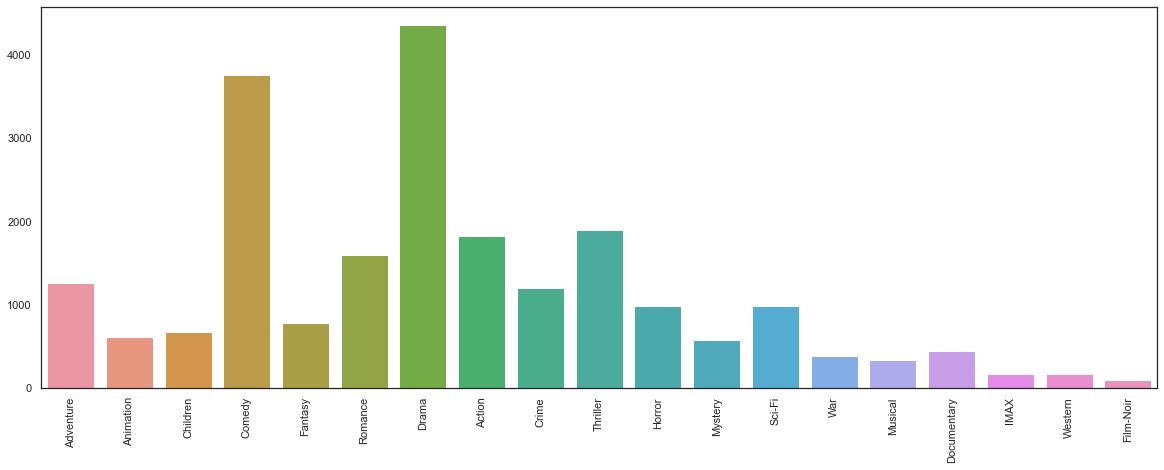

In [44]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)

### Number of Ratings by Top 20 Users

In [45]:
df_user = df.groupby('userId').count().reset_index().sort_values(by='title', ascending=False)
df_user.head()

,userId,movieId,title,genres,rating,timestamp
413,414.0,2698,2698,2698,2698,2698
598,599.0,2478,2478,2478,2478,2478
473,474.0,2108,2108,2108,2108,2108
447,448.0,1864,1864,1864,1864,1864
273,274.0,1346,1346,1346,1346,1346


<AxesSubplot:xlabel='userId', ylabel='title'>

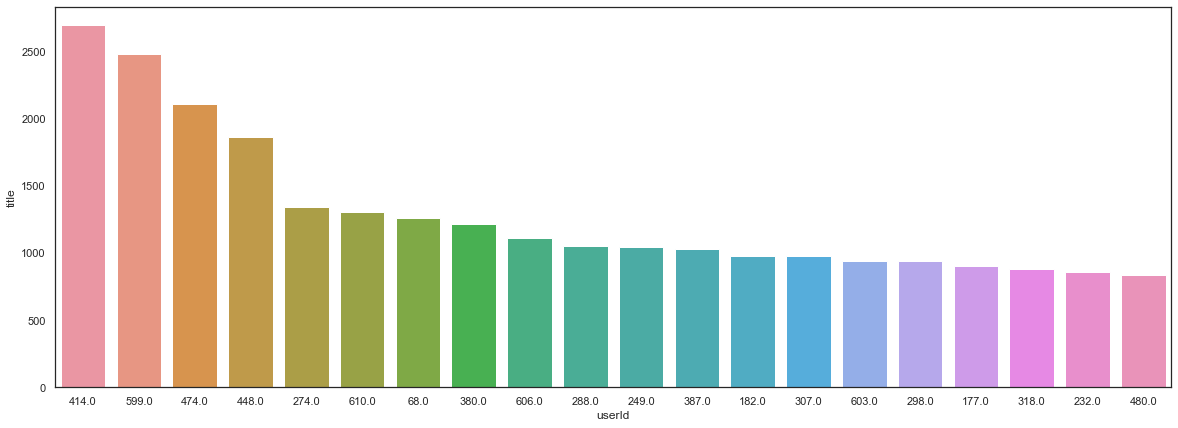

In [46]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_user[:20], x='userId', y='title', order=df_user[:20].sort_values('title', ascending=False).userId)